# Advanced Machine Learning Concepts Notebook

## 1. Feature Engineering and Selection

### 1.1 Feature Engineering Techniques
- Polynomial Features
- Binning
- Interaction Terms
- Text Processing
- Date and Time Features

### 1.2 Feature Selection Methods
- Recursive Feature Elimination (RFE)
- Feature Importance from Trees
- LASSO Regression (L1 Regularization)

## 2. Model Evaluation and Metrics

### 2.1 Classification Metrics
- Accuracy, Precision, Recall, F1-Score
- ROC Curve and AUC
- Confusion Matrix

### 2.2 Regression Metrics
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-squared (R2)

### 2.3 Cross-Validation Techniques
- k-Fold Cross-Validation
- Stratified Cross-Validation
- Time Series Cross-Validation

## 3. Ensemble Learning

### 3.1 Bagging
- Random Forest
- Bagging Classifier

### 3.2 Boosting
- AdaBoost
- Gradient Boosting
- XGBoost

### 3.3 Stacking
- Combining Multiple Models

## 4. Hyperparameter Tuning

### 4.1 Grid Search
- Searching Hyperparameter Space

### 4.2 Randomized Search
- Randomized Hyperparameter Optimization

### 4.3 Bayesian Optimization
- Probabilistic Model-Based Optimization

## 5. Unsupervised Learning

### 5.1 Clustering
- K-Means Clustering
- Hierarchical Clustering

### 5.2 Dimensionality Reduction
- Principal Component Analysis (PCA)
- t-Distributed Stochastic Neighbor Embedding (t-SNE)

## 6. Deep Learning

### 6.1 Neural Networks with TensorFlow/Keras
- Building and Training Neural Networks
- Convolutional Neural Networks (CNNs)
- Recurrent Neural Networks (RNNs)

### 6.2 Transfer Learning
- Using Pre-trained Models
- Fine-tuning


# 1. Feature Engineering and Selection



## 1.1 Feature Engineering Techniques

### 1.1.1 Polynomial Features

Polynomial features are a way to generate features by raising the existing features to a power. It can be particularly useful in capturing nonlinear relationships in the data

.



In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Sample data
data = np.array([[2, 3],
                 [1, 4],
                 [5, 2]])

# Applying polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data)

print("Original Data:")
print(data)
print("\nPolynomial Features (Degree 2):")
print(poly_features)


Original Data:
[[2 3]
 [1 4]
 [5 2]]

Polynomial Features (Degree 2):
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  1.  4.  1.  4. 16.]
 [ 1.  5.  2. 25. 10.  4.]]


### 1.1.2 Binning

Binning involves converting numerical variables into categorical bins. It can help deal with outliers and convert continuous data into discrete categories.



In [2]:
import pandas as pd

# Sample data
data = {'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]}
df = pd.DataFrame(data)

# Binning the 'Age' column into categories
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

print(df)


   Age Age Category
0   25        Young
1   30        Young
2   35  Middle-aged
3   40  Middle-aged
4   45  Middle-aged
5   50  Middle-aged
6   55       Senior
7   60       Senior
8   65       Senior
9   70       Senior


### 1.1.3 Interaction Terms

Interaction terms are created by multiplying two or more features together. They can help capture complex relationships between features.

In [3]:
# Sample data
data = np.array([[2, 3],
                 [1, 4],
                 [5, 2]])

# Creating interaction terms manually
interaction_terms = data[:, 0] * data[:, 1]

print("Original Data:")
print(data)
print("\nInteraction Terms:")
print(interaction_terms)


Original Data:
[[2 3]
 [1 4]
 [5 2]]

Interaction Terms:
[ 6  4 10]


### 1.1.4 Text Processing

Text processing techniques include tokenization, stemming, and vectorization. These are essential for converting text data into a format suitable for machine learning algorithms.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

# Tokenization and vectorization using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary:")
print(vectorizer.get_feature_names_out())
print("\nVectorized Data:")
print(X.toarray())


Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Vectorized Data:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### 1.1.5 Date and Time Features


Date and time features can be extracted from timestamps to provide valuable information to the machine learning model, such as day of the week, month, or hour.

In [5]:
import pandas as pd

# Sample data with timestamps
data = {'Timestamp': ['2023-09-30 08:15:00', '2023-09-30 12:45:00', '2023-09-30 18:30:00']}
df = pd.DataFrame(data)

# Converting 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting date and time features
df['Day of Week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

print(df)


            Timestamp  Day of Week  Hour
0 2023-09-30 08:15:00            5     8
1 2023-09-30 12:45:00            5    12
2 2023-09-30 18:30:00            5    18


## 1.2 Feature Selection Methods

### 1.2.1 Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes features and builds a model on the remaining features. It ranks features based on their importance and eliminates the least significant ones.


In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# Load diabetes dataset as an example
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Creating a linear regression model
model = LinearRegression()

# Using RFE to select top 3 features
rfe = RFE(estimator=model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

print("Selected Features:")
print(rfe.support_)


Selected Features:
[False False  True False  True False False False  True False]


In this example, RFE selects the top 3 features based on a Linear Regression model.

### 1.2.2 Feature Importance from Trees


Feature Importance from Trees can be obtained from tree-based algorithms like Random Forest or Gradient Boosting. It calculates feature importance scores based on how frequently a feature is used to split the data across all decision trees.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Creating a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Getting feature importances
feature_importances = model.feature_importances_

print("Feature Importances:")
print(feature_importances)


Feature Importances:
[0.10612762 0.02167809 0.43612951 0.43606478]


In this example, feature importances are calculated using a Random Forest Classifier on the Iris dataset.

### 1.2.3 LASSO Regression (L1 Regularization)

    
    LASSO Regression (Least Absolute Shrinkage and Selection Operator) uses L1 regularization to penalize the absolute size of coefficients, encouraging some of them to be exactly zero. This leads to feature selection.

In [8]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load diabetes dataset as an example
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a LASSO Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Getting coefficients (features with non-zero coefficients are selected)
selected_features = [feature for feature, coef in zip(diabetes.feature_names, lasso.coef_) if coef != 0]

print("Selected Features:")
print(selected_features)


Selected Features:
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


In this example, LASSO Regression is used to select features from the Diabetes dataset.

These methods offer various ways to select relevant features for your machine learning models based on different underlying principles. You can use them according to the specific requirements and characteristics of your dataset.

## 2.1 Classification Metrics

### 2.1.1 Accuracy

Accuracy measures the ratio of correctly predicted instances to the total instances. It's a common metric for classification problems.

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


### 2.1.2 Precision, Recall, F1-Score

Precision measures the ratio of correctly predicted positive observations to the total predicted positives. Recall (Sensitivity) measures the ratio of correctly predicted positive observations to all observations in the actual class. F1-Score is the harmonic mean of precision and recall.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming predictions and true labels are available
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


### 2.1.3 ROC Curve and AUC

ROC (Receiver Operating Characteristic) Curve is a graphical representation of the true positive rate against the false positive rate. AUC (Area Under Curve) represents the degree or measure of separability.


In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming probabilities of class 1 are available (for binary classification)
probs = model.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

### 2.1.4 Confusion Matrix
Confusion Matrix is a table used for evaluating the performance of a classification algorithm.

In [12]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 2.2 Regression Metrics
### 2.2.1 Mean Absolute Error (MAE)
Mean Absolute Error (MAE) represents the average of the absolute errors between the predicted and actual values.

In [13]:
from sklearn.metrics import mean_absolute_error

# Assuming predictions and true labels are available
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')


Mean Absolute Error: 0.00


### 2.2.2 Mean Squared Error (MSE) and R-squared (R2)
Mean Squared Error (MSE) represents the average of the squared errors between predicted and actual values. R-squared (R2) represents the proportion of the variance in the dependent variable that is predictable from the independent variables

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming predictions and true labels are available
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error: 0.00
R-squared (R2): 1.00


## 2.3 Cross-Validation Techniques
### 2.3.1 k-Fold Cross-Validation
k-Fold Cross-Validation divides the dataset into k subsets (folds) and uses each fold as a validation set while training the model on the remaining k-1 folds.

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Creating a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Applying k-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


### 2.3.2 Stratified Cross-Validation
Stratified Cross-Validation ensures that each fold maintains the same class distribution as the original dataset.

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Assuming X, y are your features and labels
stratkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratkf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate your model here
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9


### 2.3.3 Time Series Cross-Validation
Time Series Cross-Validation is used for time series data where the order of data points matters. It involves using past data for training and future data for validation.

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Assuming X, y are your features and labels
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate your model here
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse)


Mean Squared Error: 0.0
Mean Squared Error: 1.0
Mean Squared Error: 0.018868056956335335
Mean Squared Error: 0.3483620695449149
Mean Squared Error: 0.12217397712069693


## 3. Ensemble Learning
### 3.1 Bagging
Bagging (Bootstrap Aggregating) uses multiple instances of the same learning algorithm on different subsets of the training data.

<b>Random Forest<b>
Random Forest is an ensemble learning method that combines multiple individual decision tree models.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X, y are your features and labels
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


### Bagging Classifier
Bagging Classifier is a general ensemble method that can be used with any base estimator.

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X, y are your features and labels
base_estimator = DecisionTreeClassifier(random_state=42)
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### 3.2 Boosting
Boosting builds multiple models sequentially, with each model trying to correct the errors of the previous one.

#### AdaBoost
AdaBoost (Adaptive Boosting) focuses more on the difficult-to-classify samples.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming X, y are your features and labels
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


### Gradient Boosting

Gradient Boosting builds trees sequentially, with each tree trying to correct the errors of the combined model.



In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X, y are your features and labels
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


### XGBoost
XGBoost is an optimized and scalable version of gradient boosting.

In [ ]:
import xgboost as xgb

# Assuming X, y are your features and labels
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


## 3.3 Stacking

Stacking combines multiple models using another model, known as a meta-learner.

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming X, y are your features and labels
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

meta_learner = LogisticRegression()

model = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

These techniques form the backbone of ensemble learning, offering various ways to combine multiple models for improved predictive performance

## 4.1 Grid Search

Grid Search is a hyperparameter tuning technique that exhaustively tests a predefined set of hyperparameters for a model. It evaluates all possible hyperparameter combinations and selects the best one based on cross-validated performance.






In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Applying Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## 4.2 Randomized Search
Randomized Search is a hyperparameter optimization technique that randomly samples hyperparameter combinations. It performs a fixed number of iterations and evaluates a random subset of the hyperparameter space.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameters and their possible values using distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11)
}

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Applying Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X, y)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 142}


## 4.3 Bayesian Optimization
Bayesian Optimization is a probabilistic model-based optimization technique that models the objective function and selects the next hyperparameters to evaluate based on the model's predictions.

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameters and their possible value ranges
param_space = {
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 11)
}

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Applying Bayesian Optimization
bayesian_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=10, cv=5, random_state=42)
bayesian_search.fit(X, y)

# Best hyperparameters
best_params = bayesian_search.best_params_
print("Best Hyperparameters:", best_params)


In these examples:

Grid Search exhaustively evaluates all combinations in the specified hyperparameter grid.

    
Randomized Search randomly selects combinations from specified distributions and evaluates a subset.


Bayesian Optimization probabilistically models the objective function and selects combinations to evaluate, focusing on promising areas in the hyperparameter space.


## 5.1 Clustering

###  
5.1.1 K-Means Clusterin


K-Means Clustering is an unsupervised learning algorithm that partitions the dataset into K clusters, where each data point belongs to the cluster with the nearest mean.

C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

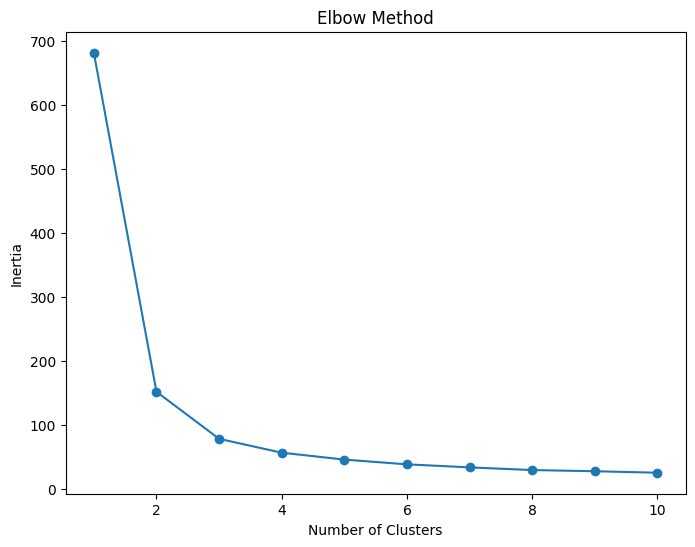

Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


C:\Users\irosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load iris dataset as an example
iris = load_iris()
X = iris.data

# Choosing the number of clusters (K) using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# From the graph, choose the optimal number of clusters, e.g., K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster labels for each data point
labels = kmeans.labels_
print("Cluster Labels:", labels)


### 5.1.2 Hierarchical Clustering
Hierarchical Clustering builds a tree of clusters, known as a dendrogram. It doesn't require specifying the number of clusters beforehand.

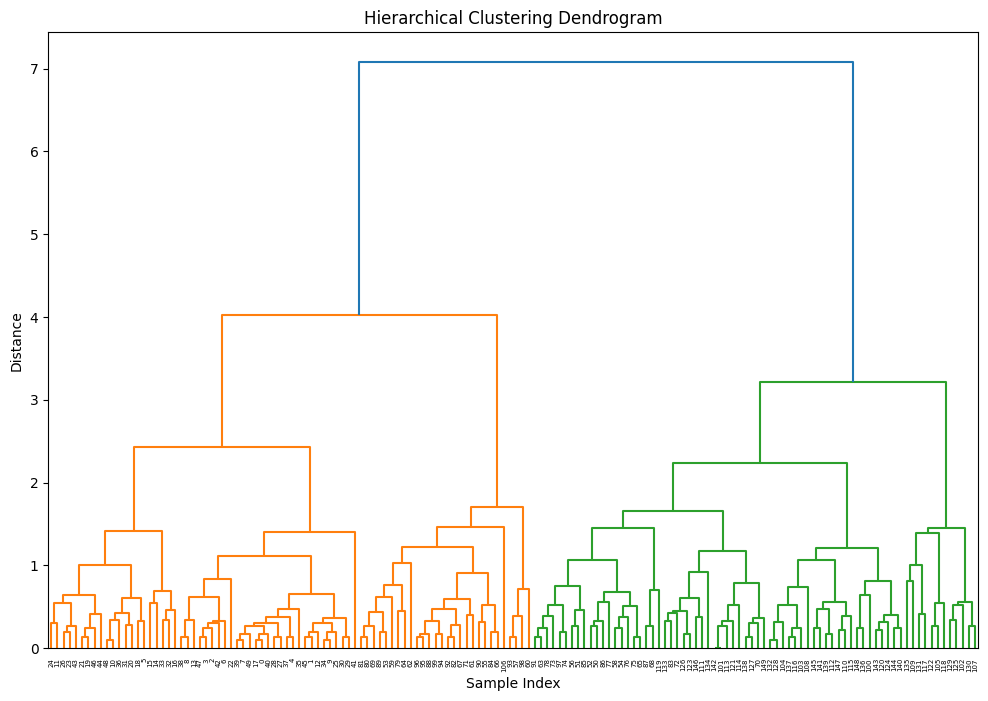

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X = iris.data

# Applying hierarchical clustering using complete linkage
linked = linkage(X, 'complete')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


## 5.2 Dimensionality Reduction
### 5.2.1 Principal Component Analysis (PCA)
Principal Component Analysis (PCA) reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace, capturing the most important patterns of variation.

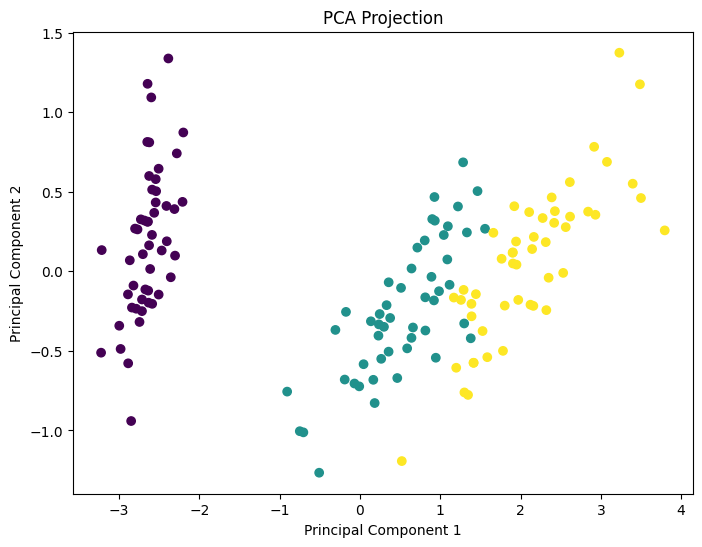

In [31]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X = iris.data

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Visualizing the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()


### 5.2.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well-suited for visualization of high-dimensional datasets.



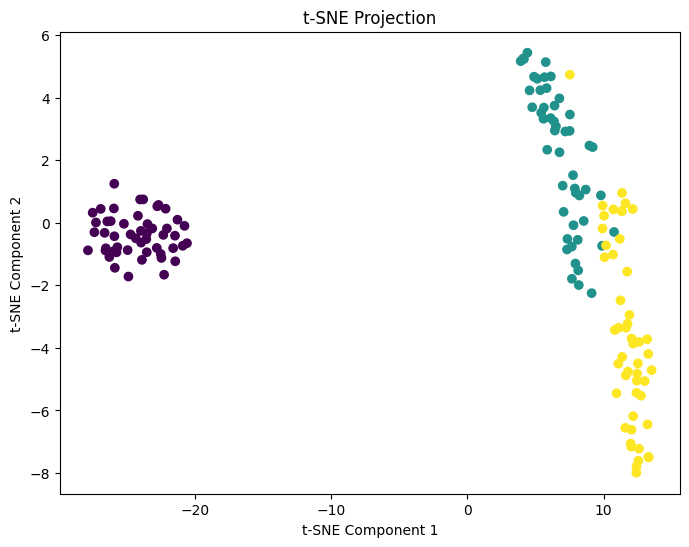

In [32]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load iris dataset as an example
iris = load_iris()
X = iris.data

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualizing the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection')
plt.show()


In these examples:


K-Means Clustering divides the data into distinct clusters based on the mean values of the features.

Hierarchical Clustering builds a tree of clusters, offering insight into the hierarchy of the data.

PCA and t-SNE reduce the dimensionality of the data for visualization purposes, making it easier to explore the underlying patterns.





## 6.1 Neural Networks with TensorFlow/Keras

### 6.1.1 Building and Training Neural Networks

Building and Training Neural Networks involve defining the architecture of the neural network, compiling it with an optimizer and loss function, and then training it on the data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample data (features and labels)
X, y = ...

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


### 6.1.2 Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are used for image-related tasks and can capture spatial patterns in the data.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Sample image data (X: images, y: labels)
X, y = ...

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], X.shape[3])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the CNN model (similar to the previous example)


### 6.1.3 Recurrent Neural Networks (RNNs)
Recurrent Neural Networks (RNNs) are used for sequence-related tasks and can capture patterns in sequential data.

In [ ]:
from tensorflow.keras.layers import LSTM

# Sample sequence data (X: sequences, y: labels)
X, y = ...

# Build RNN model
model = Sequential([
    LSTM(50, input_shape=(X.shape[1], X.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile and train the RNN model (similar to the previous examples)


## 6.2 Transfer Learning

### 6.2.1 Using Pre-trained Models

Using Pre-trained Models involves leveraging models trained on large datasets and fine-tuning them for specific tasks.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without top classification layers
base_model = VGG16(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model with custom layers on top of the pre-trained model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile and train the model (similar to previous examples)


### 6.2.2 Fine-tuning

Fine-tuning involves training only specific layers of a pre-trained model, allowing these layers to adapt to a new dataset while keeping the pre-trained weights in the earlier layers fixed.

In [ ]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze specific layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile and train the model (similar to previous examples)


In [ ]:
In these examples:

Neural Networks are constructed and trained for various tasks, including generic classification, image-related tasks (using CNNs), and sequence-related tasks (using RNNs).

Transfer Learning is demonstrated by using pre-trained models like VGG16, and fine-tuning is illustrated by selectively unfreezing and training specific layers. Fine-tuning allows the model to adapt to a specific task while leveraging the knowledge learned from a large and general dataset.